Import package

In [1]:
from ensbinclass import preprocessing as pre
from ensbinclass import featureSelection as fs
from ensbinclass import classifier as cl
from ensbinclass import ensemble as ens 

In [2]:
import numpy as np
np.random.seed(42)

In [3]:
pr = pre.DataPreprocessing()
pr.load_data('test_data/exampleData_TCGA_LUAD_2000.csv')
pr.show_data()

All columns are numeric
   class       SFTPC      SLC6A4      CLDN18        AGER       ITLN2  \
0      0  1956543357  1194806369  1431426819    15756623  9202700052   
1      0  1882400352  1212759862  1410754294  1466652971  7496015673   
2      0   185419824   117178896  1350193883  1493867899  8440654097   
3      0  1883454212  8590519685  1413681776  1401127311  7259752678   
4      0   189885652  1090221599  1382853275  1586313843  9767982962   

         LGI3    C13orf36      FAM83A       FABP4  ...        NEXN  \
0  1104918265   781892276  4642643817  1200926661  ...  9059098627   
1  1095692946   599455936  4397002003  1340728849  ...  8334597771   
2   974068509  7331127442  1885183866  1395746318  ...  9298702299   
3  1083758008  4755827619  3122490507   850509221  ...    72414951   
4  1135184185  9122156047  5235413063  1081828059  ...  9521703289   

       RASSF8        NKD1     PLEKHH2        EDN2       WDR86      CHRNB4  \
0  9661630615  7501576879  9103011571  295309

In [4]:
X, y = pr.set_target('class')

In [5]:
pr.remove_collinear_features(threshold=0.75)

In [6]:
X.head()

,SFTPC,SLC6A4,CLDN18,AGER,ITLN2,LGI3,C13orf36,FAM83A,FABP4,HBA1,...,NEXN,RASSF8,NKD1,PLEKHH2,EDN2,WDR86,CHRNB4,RNF128,C11orf21,APOLD1
0,1956543357,1194806369,1431426819,15756623,9202700052,1104918265,781892276,4642643817,1200926661,1162513211,...,9059098627,9661630615,7501576879,9103011571,2953097582,4219718383,459116814,9332454634,6570503916,9026301004
1,1882400352,1212759862,1410754294,1466652971,7496015673,1095692946,599455936,4397002003,1340728849,1425779439,...,8334597771,9468622007,5375091576,8509453578,5702740646,4540306306,790605243,9044077675,7632261671,8920244761
2,185419824,117178896,1350193883,1493867899,8440654097,974068509,7331127442,1885183866,1395746318,1276355899,...,9298702299,983135887,7455911578,8642815992,6183097403,5274858001,621805735,8867469336,551476612,9829651391
3,1883454212,8590519685,1413681776,1401127311,7259752678,1083758008,4755827619,3122490507,850509221,1296542936,...,72414951,9734491337,4948227044,8501260788,3122490507,2761646966,0,9414209755,4755827619,1011022437
4,189885652,1090221599,1382853275,1586313843,9767982962,1135184185,9122156047,5235413063,1081828059,1200170582,...,9521703289,1000492591,8256334196,1013001526,1345282818,4646168419,1158789414,1013041187,5370506078,1007872644


In [7]:
X = pr.normalization()
X.head()

,SFTPC,SLC6A4,CLDN18,AGER,ITLN2,LGI3,C13orf36,FAM83A,FABP4,HBA1,...,NEXN,RASSF8,NKD1,PLEKHH2,EDN2,WDR86,CHRNB4,RNF128,C11orf21,APOLD1
0,0.196223,0.122707,0.143171,0.001183,0.928539,0.110783,0.078967,0.464778,0.121346,0.116256,...,0.908280,0.966734,0.763786,0.912309,0.298526,0.427345,0.061727,0.934190,0.814399,0.906958
1,0.188787,0.124551,0.141104,0.146586,0.756337,0.109858,0.060542,0.440187,0.135472,0.142583,...,0.835556,0.947404,0.547188,0.852753,0.576485,0.459812,0.106294,0.905300,0.946002,0.896288
2,0.018596,0.012034,0.135047,0.149313,0.851650,0.097664,0.740402,0.188727,0.141031,0.127640,...,0.932332,0.097572,0.759134,0.866134,0.625044,0.534203,0.083599,0.887608,0.068354,0.987774
3,0.188892,0.882248,0.141397,0.140019,0.732498,0.108662,0.480311,0.312595,0.085938,0.129659,...,0.006203,0.974031,0.503709,0.851931,0.315650,0.279681,0.000000,0.942380,0.589474,0.100627
4,0.019044,0.111966,0.138313,0.158578,0.985575,0.113818,0.921286,0.524121,0.109312,0.120022,...,0.954716,0.099310,0.840663,0.100575,0.135993,0.470533,0.155795,0.100753,0.665662,0.100310


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

Feature selection

LASSO

In [9]:
lasso_features = fs.FeatureSelection(
    X, 
    y,
    method_='lasso',
    size=100,
    params={
        'alpha': 0.1,
        'fit_intercept': True,
        'precompute': False,
        'max_iter': 10000,
        'tol': 0.0001,
        'selection': 'cyclic',
        'random_state': 42,
    },
)

ReliefF

In [10]:
relieff_features = fs.FeatureSelection(
    X,
    y,
    method_='relieff',
    size=100,
    params={
        'n_neighbors': 100,
        'n_features_to_keep': 100,
    },
)

Get profile

In [11]:
fs.get_profile(
    return_dataframe=True,
    organism='hsapiens',
    query=lasso_features.features[:5],
)

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0050805,negative regulation of synaptic transmission,0.026771,True,"""Any process that stops, prevents, or reduces ...",55,4,2,21031,0.5,0.036364,query_1,"[GO:0007268, GO:0010648, GO:0023057, GO:0050804]"
1,GO:MF,GO:0019811,cocaine binding,0.049875,True,"""Binding to cocaine (2-beta-carbomethoxy-3-bet...",1,5,1,20212,0.2,1.000000,query_1,"[GO:0043169, GO:0097159, GO:1901363]"
2,GO:MF,GO:0050785,advanced glycation end-product receptor activity,0.049875,True,"""Combining with advanced glycation end-product...",1,5,1,20212,0.2,1.000000,query_1,[GO:0038023]


Classifier

In [12]:
clf = cl.Classifier(
    X,
    y,
    features=[
        relieff_features.features,
        lasso_features.features,
    ],
    classifiers=[
        'svm',
        'adaboost',
        'random_forest',
    ],
    classifier_params=[
        {'svm': {
            'C': 1, 'kernel': 'linear', 'gamma': 'auto'
            }
        },
        {'adaboost': {
            'n_estimators': 100, 'learning_rate': 0.9
            }
        },
        {'random_forest': {
            'n_estimators': 100, 'criterion': 'gini', 'max_depth': None
            }
        },
    ],
    cv='stratified_k_fold',
    cv_params={'n_splits': 10},
    repetitions=10,
)    

In [13]:
clf.all_metrics()

["ACC: {'RELIEFF_SVM': [0.987, 0.015], 'RELIEFF_ADABOOST': [0.994, 0.011], 'RELIEFF_RANDOM_FOREST': [0.99, 0.013], 'LASSO_SVM': [0.995, 0.009], 'LASSO_ADABOOST': [0.992, 0.012], 'LASSO_RANDOM_FOREST': [0.99, 0.014]}",
 "Roc Auc: {'RELIEFF_SVM': [0.978, 0.038], 'RELIEFF_ADABOOST': [0.991, 0.023], 'RELIEFF_RANDOM_FOREST': [0.971, 0.048], 'LASSO_SVM': [0.99, 0.026], 'LASSO_ADABOOST': [0.982, 0.033], 'LASSO_RANDOM_FOREST': [0.971, 0.049]}",
 "F1 score: {'RELIEFF_SVM': [0.993, 0.008], 'RELIEFF_ADABOOST': [0.996, 0.006], 'RELIEFF_RANDOM_FOREST': [0.994, 0.007], 'LASSO_SVM': [0.997, 0.005], 'LASSO_ADABOOST': [0.996, 0.007], 'LASSO_RANDOM_FOREST': [0.994, 0.008]}",
 "MCC: {'RELIEFF_SVM': [0.938, 0.072], 'RELIEFF_ADABOOST': [0.969, 0.051], 'RELIEFF_RANDOM_FOREST': [0.945, 0.07], 'LASSO_SVM': [0.973, 0.047], 'LASSO_ADABOOST': [0.961, 0.06], 'LASSO_RANDOM_FOREST': [0.945, 0.076]}"]

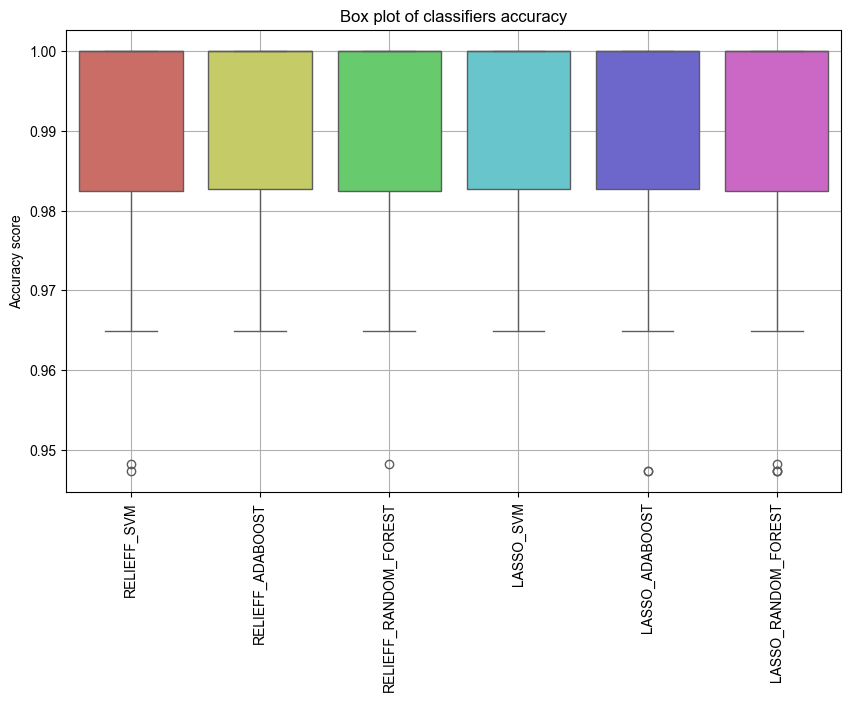

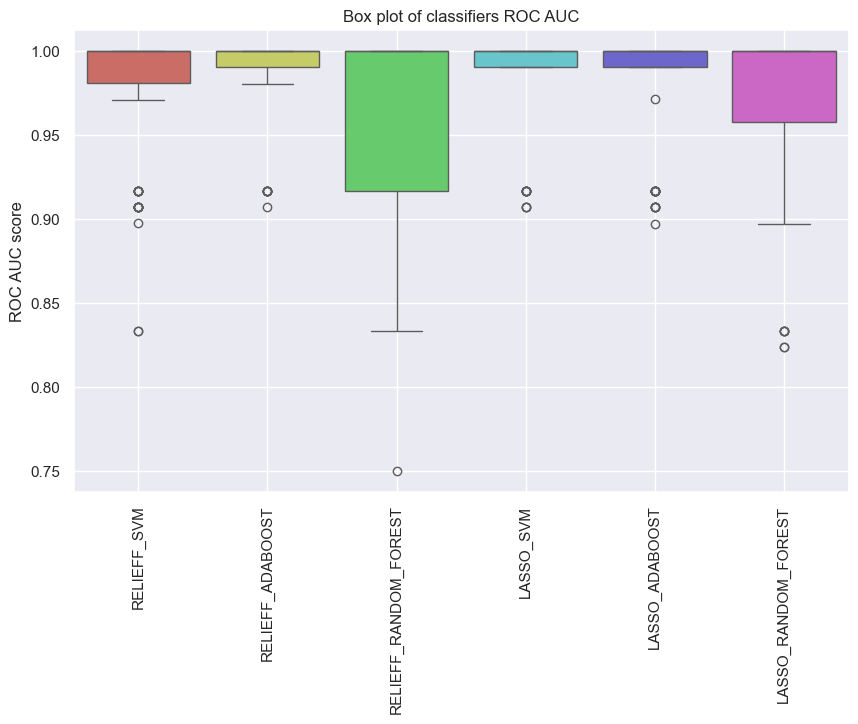

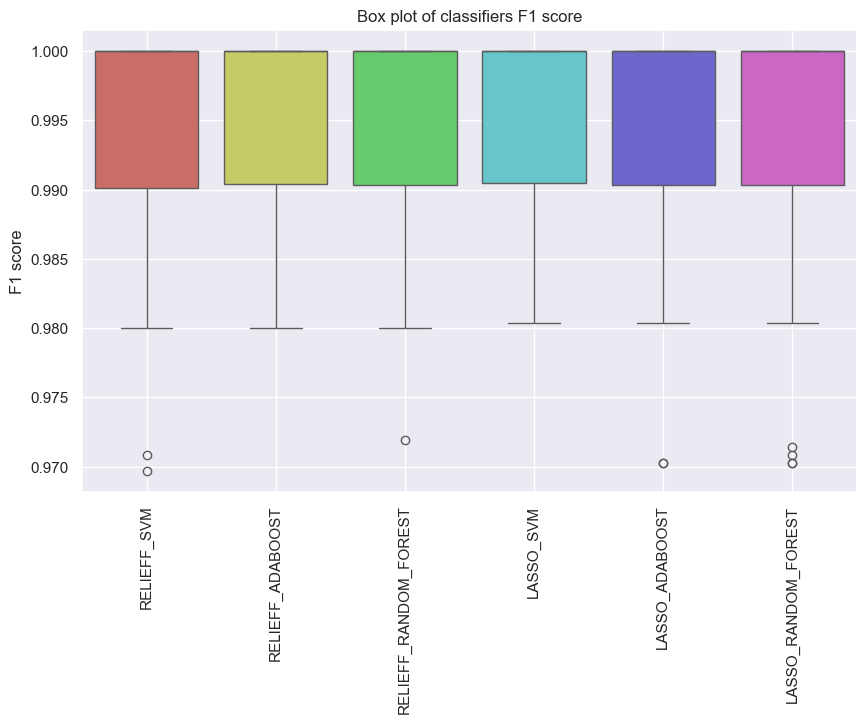

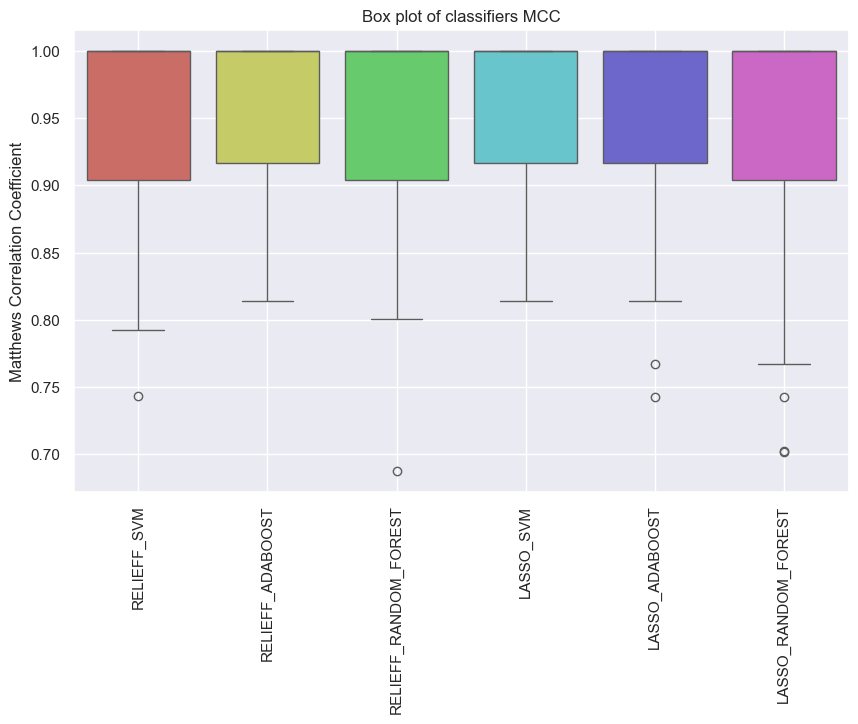

In [14]:
clf.plot_all()

Ensemble

In [15]:
ens_voting = ens.Ensemble(
    X,
    y,
    features=[
        relieff_features.features,
        lasso_features.features,
    ],
    classifiers=[
        'adaboost',
        'random_forest',
        'svm',
    ],
    classifier_params=[
        {'adaboost': {
            'n_estimators': 100, 'learning_rate': 0.9,
            }
        },
        {'random_forest': {
            'n_estimators': 100, 'criterion': 'gini', 'max_depth': None,
            }
        },
        {'svm': {
            'C': 1, 'kernel': 'linear', 'gamma': 'auto'
            }
        },
    ],  
    cv='stratified_k_fold',
    cv_params={'n_splits': 10},
    ensemble=[
        'voting',
    ],
    ensemble_params=[
        {'voting': {
            'voting': 'soft'
            }
        },
    ],
    repetitions=10,
)

In [16]:
ens_voting.all_metrics()

["ACC: {'RELIEFF_VOTING': [0.991, 0.012], 'LASSO_VOTING': [0.995, 0.009]}",
 "Roc Auc: {'RELIEFF_VOTING': [0.98, 0.039], 'LASSO_VOTING': [0.989, 0.027]}",
 "F1 score: {'RELIEFF_VOTING': [0.995, 0.007], 'LASSO_VOTING': [0.997, 0.005]}",
 "MCC: {'RELIEFF_VOTING': [0.952, 0.061], 'LASSO_VOTING': [0.973, 0.047]}"]

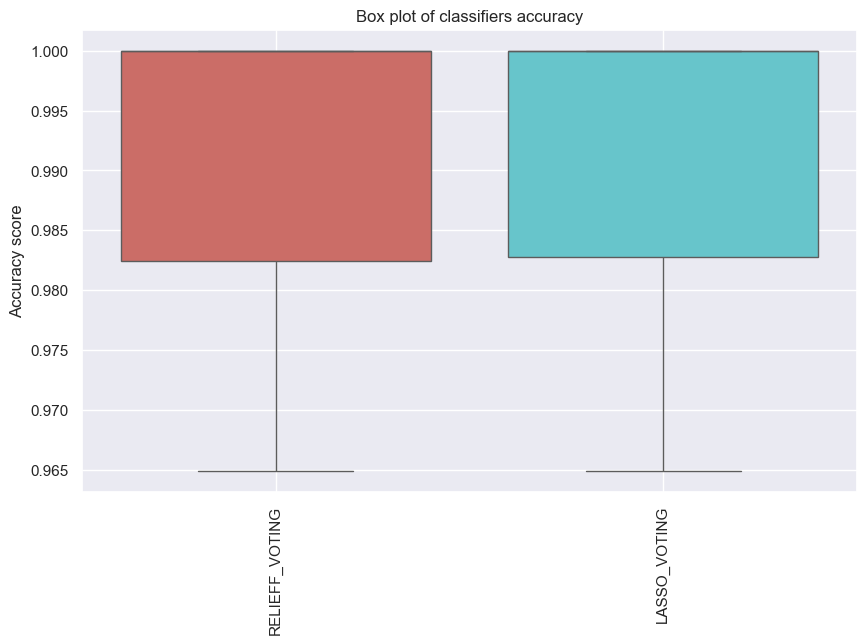

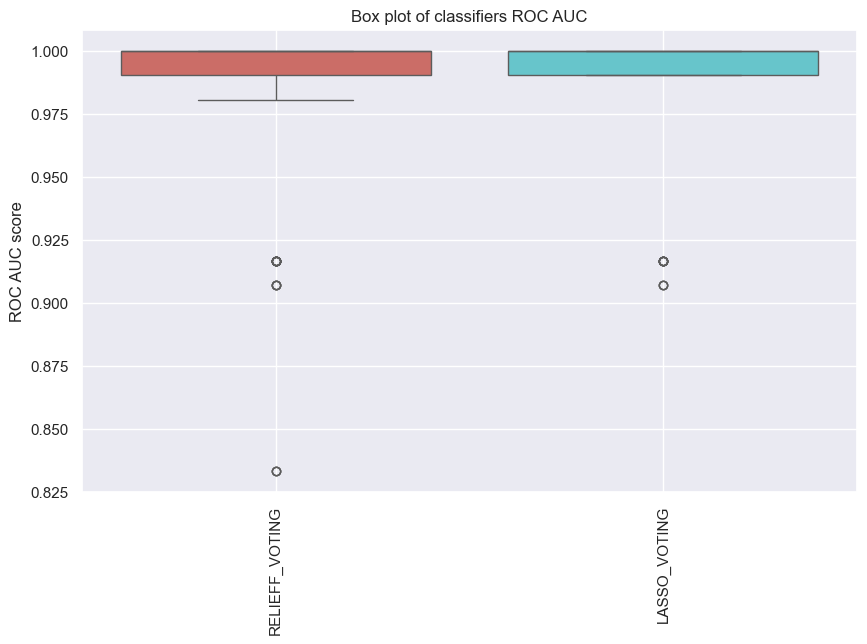

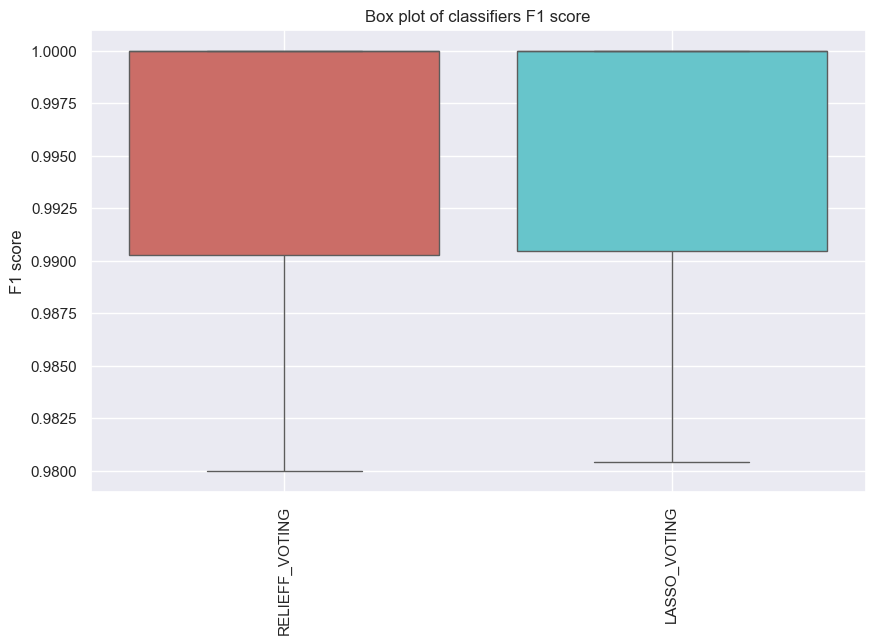

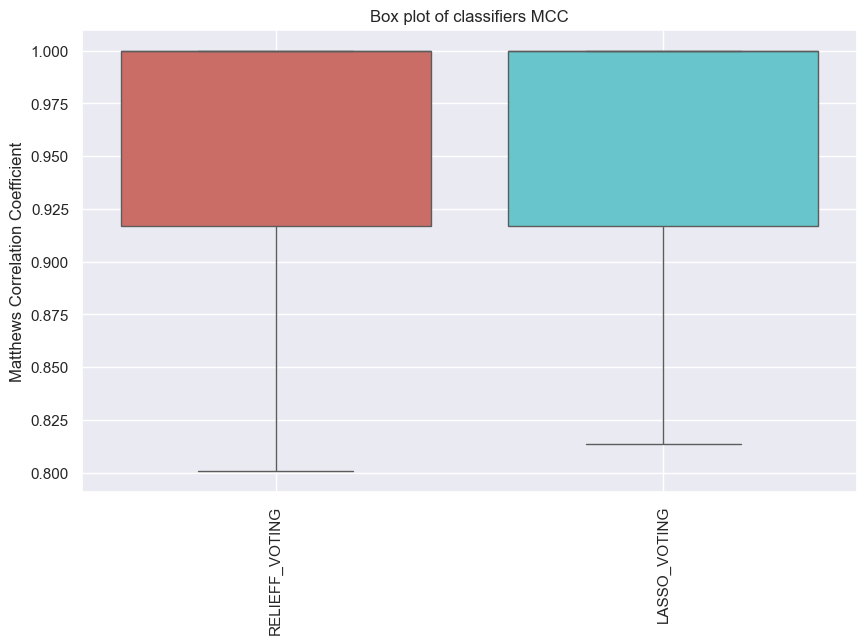

In [17]:
ens_voting.plot_all()

In [18]:
ens_bagging = ens.Ensemble(
    X,
    y,
    features=[
        relieff_features.features,
        lasso_features.features,
    ],
    classifiers=[
        'adaboost',
        'random_forest',
        'svm',
    ],
    classifier_params=[
        {'adaboost': {
            'n_estimators': 100, 'learning_rate': 0.9,
            }
        },
        {'random_forest': {
            'n_estimators': 100, 'criterion': 'gini', 'max_depth': None,
            }
        },
        {'svm': {
            'C': 1, 'kernel': 'linear', 'gamma': 'auto'
            }
        },
    ],  
    cv='stratified_k_fold',
    cv_params={'n_splits': 10},
    ensemble=[
        'bagging',
    ],
    ensemble_params=[
        {'bagging': {
            'estimator_name': 'random_forest', 'n_estimators': 100, 'max_samples': 0.5, 'max_features': 0.5
            }
        },
    ],
    repetitions=10,
)

In [19]:
ens_bagging.all_metrics()

["ACC: {'RELIEFF_BAGGING': [0.989, 0.013], 'LASSO_BAGGING': [0.987, 0.014]}",
 "Roc Auc: {'RELIEFF_BAGGING': [0.961, 0.052], 'LASSO_BAGGING': [0.962, 0.049]}",
 "F1 score: {'RELIEFF_BAGGING': [0.994, 0.007], 'LASSO_BAGGING': [0.993, 0.008]}",
 "MCC: {'RELIEFF_BAGGING': [0.94, 0.069], 'LASSO_BAGGING': [0.931, 0.072]}"]

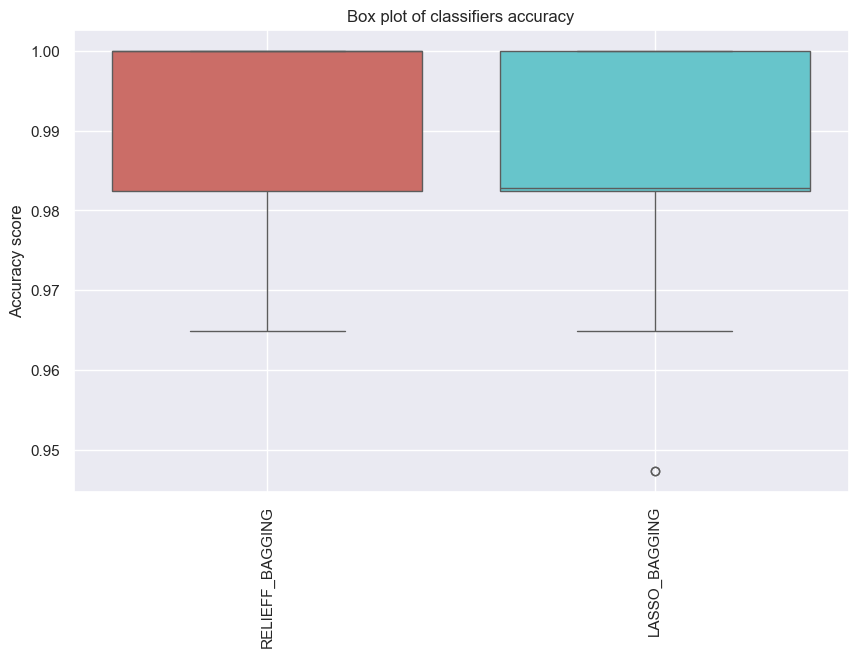

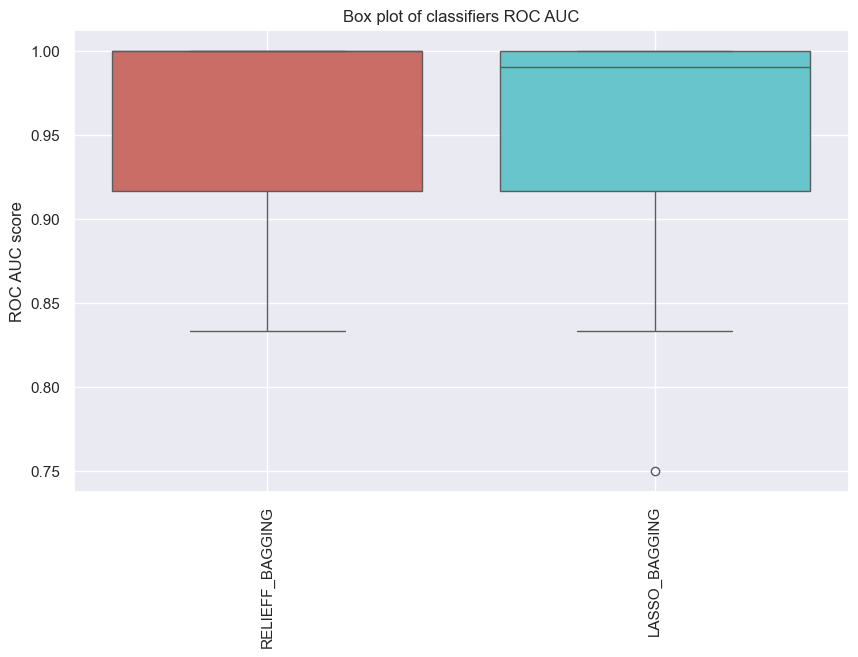

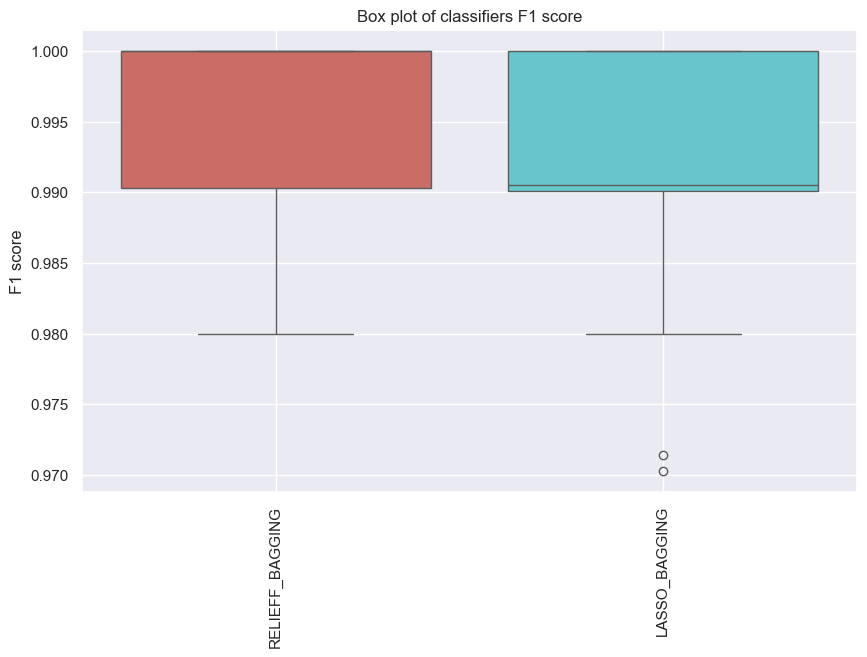

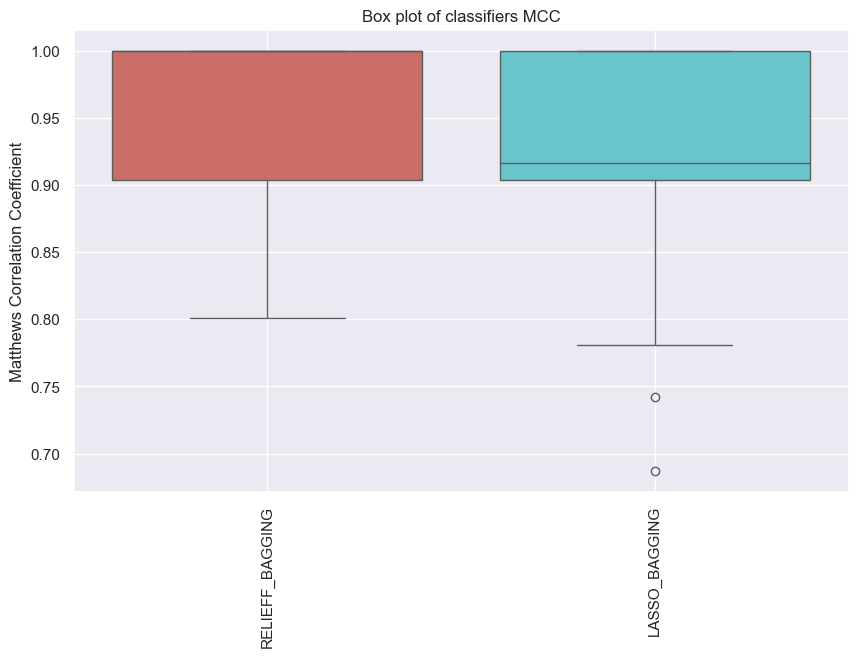

In [20]:
ens_bagging.plot_all()

In [21]:
ens_stacking = ens.Ensemble(
    X,
    y,
    features=[
        relieff_features.features,
        lasso_features.features,
    ],
    classifiers=[
        'adaboost',
        'random_forest',
        'svm',
    ],
    classifier_params=[
        {'adaboost': {
            'n_estimators': 100, 'learning_rate': 0.9,
            }
        },
        {'random_forest': {
            'n_estimators': 100, 'criterion': 'gini', 'max_depth': None,
            }
        },
        {'svm': {
            'C': 1, 'kernel': 'linear', 'gamma': 'auto'
            }
        },
    ],  
    cv='stratified_k_fold',
    cv_params={'n_splits': 10},
    ensemble=[
        'stacking',
    ],
    ensemble_params=[
        {'stacking': {
            'final_estimator': None,
            }
        },
    ],
    repetitions=10,
)

In [22]:
ens_stacking.all_metrics()

["ACC: {'RELIEFF_STACKING': [0.993, 0.01], 'LASSO_STACKING': [0.994, 0.009]}",
 "Roc Auc: {'RELIEFF_STACKING': [0.981, 0.035], 'LASSO_STACKING': [0.984, 0.032]}",
 "F1 score: {'RELIEFF_STACKING': [0.996, 0.006], 'LASSO_STACKING': [0.997, 0.005]}",
 "MCC: {'RELIEFF_STACKING': [0.962, 0.054], 'LASSO_STACKING': [0.968, 0.051]}"]

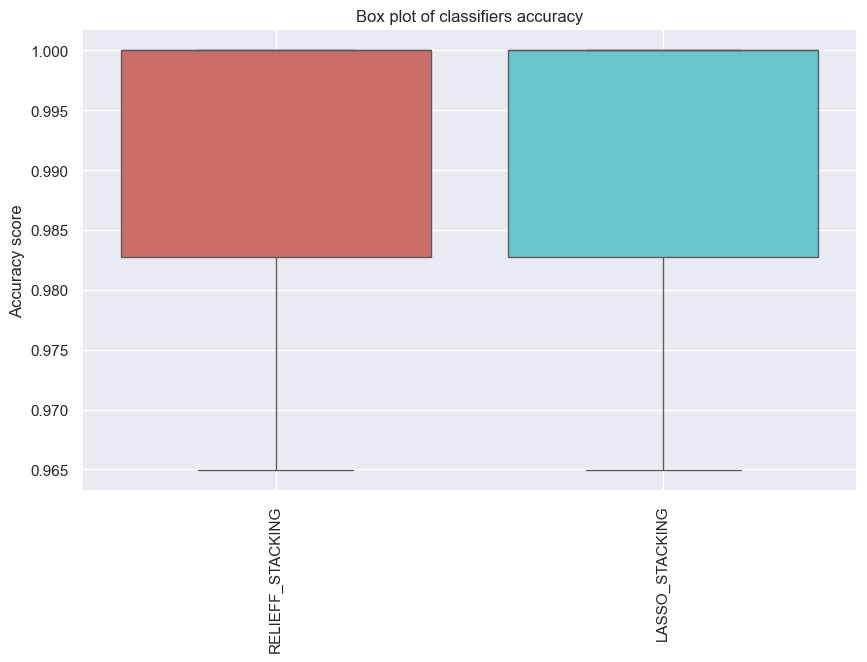

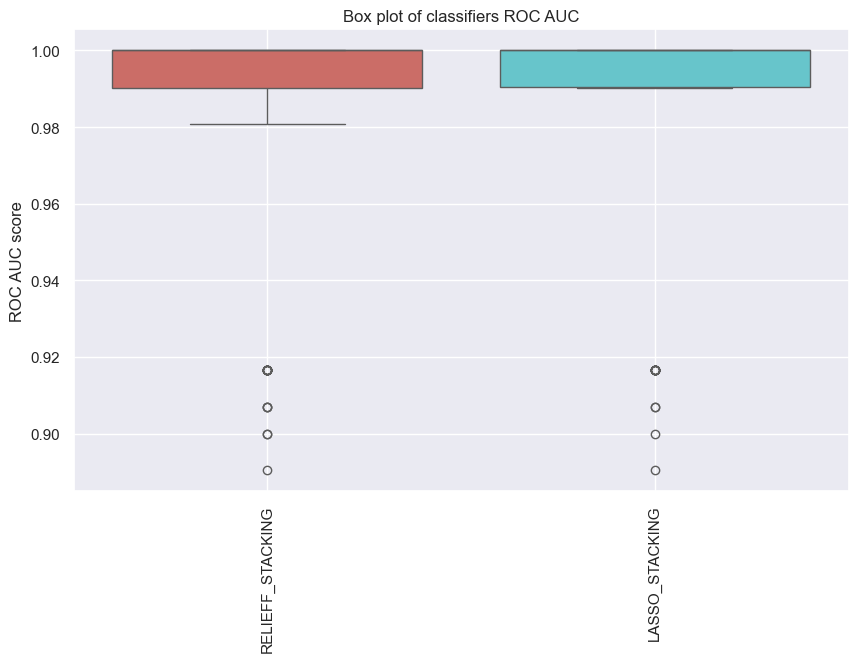

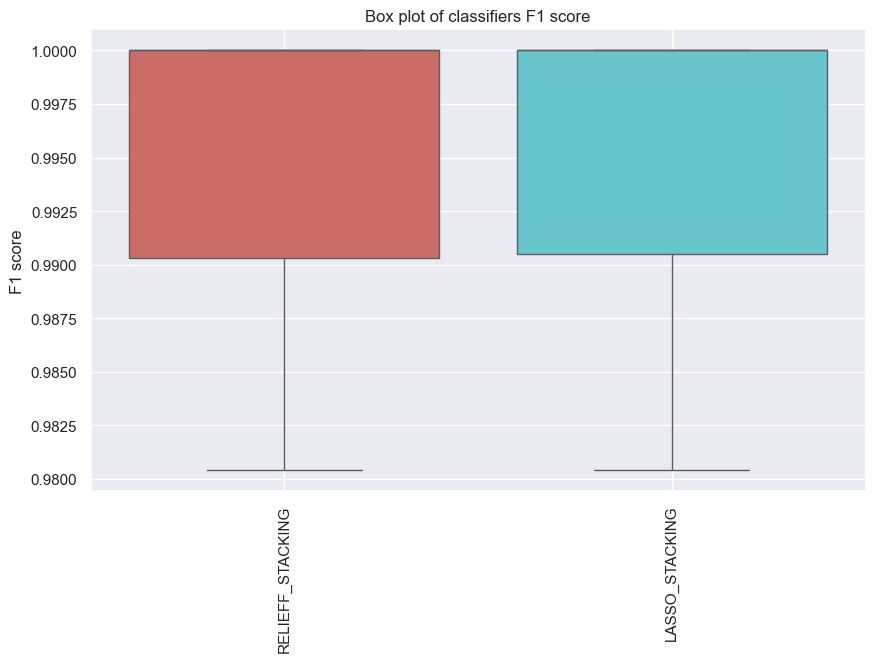

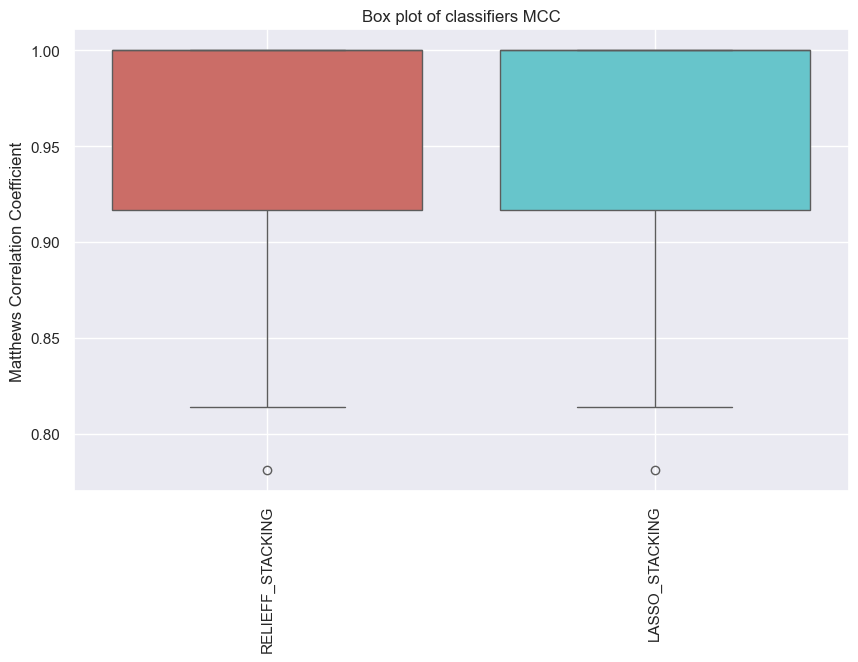

In [23]:
ens_stacking.plot_all()